# Micro-Utility: Atmospheric Mars

## Concept 
A template small ship that can be completed to fulfil mining, construction and salvage roles in planetary atmospheres. The template needs to provide cargo space, the ability to dock and automatically deposit or refill mission cargo. 
 
## Requirements 
* Must fly. This provides maneuverability necessary for the target applications. 
* Must support 1 small-grid medium cargo container's worth of ore at all non-inverted attitudes. Attitude dependent maneuvering makes utility operations dangerous.
* Must store payload resources.
* Must store and protect operator resources. These could include oxygen/hydrogen bottles, tools, or repair parts. These should not be auto-deposited.
* Must store and protect craft resources. These could include uranium or other resource required for craft operations. These should not be auto-deposited. 
* Must provide interface for operator to load all storage types manually. 
* Must provide speed appropriate for operations in a ~1 km radius of support craft. 
* Must provide life support sub-system 
  * Oxygen bottles 
  * Hydrogen bottles 
  * Suit power recharge 
* Must provide attitude control 
* Must provide battery power 
* Must provide docking sub-system 
* Structure must protect safety-critical components from small crash damage. Craft operates in restricted space and bumping walls should not cause catastrophic failure. 
* Structure must provide stable landing support. Craft should be capable of landing in rough terrain without damaging or upsetting craft. Operator should be able to enter cockpit from ground level. 
* Must have interface for attaching a single payload. Should be linked to cargo system. 
  * Grinder 
  * Welder 
  * Drill 

## Supporting Data

In [7]:
import SEmechanics
import json
with open('parameters.json') as data_file:
    parameters = json.load(data_file)
with open('blocks.json') as data_file:    
    blocks = json.load(data_file)

## Thrusters and Weight Limit

Ship is subject to gravitaional and atmospheric environments as shown in the following plots.

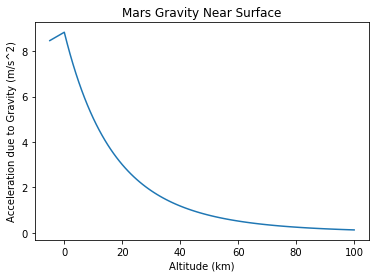

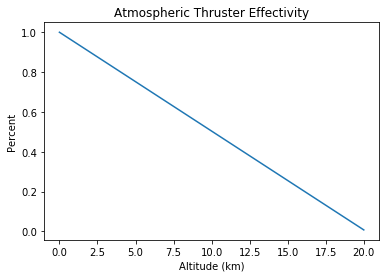

In [24]:
import matplotlib.pyplot as plt

thruster = blocks['thruster_atmospheric_small']['small_grid']
planet = parameters['celestial_bodies']['mars']

# Gravity
r_vec = [r for r in range(115,120+101)]
alt_vec = [val - planet['radius'] for val in r_vec]

a = lambda r: SEmechanics.acceleration_gravity(r, planet['g'], planet['radius'], planet['radius'])
a_vec = [a(val) for val in r_vec]

plt.plot( alt_vec, a_vec )
plt.xlabel('Altitude (km)')
plt.ylabel('Acceleration due to Gravity (m/s^2)')
plt.title('Mars Gravity Near Surface')
plt.show()

# Effectivity with Altitude
r_vec = [r for r in range(120,120+21)]
alt_vec = [val - planet['radius'] for val in r_vec]

e = lambda r: SEmechanics.e_atmospheric( r, planet['radius'], planet['limitAltitude'], planet['hills'] )
e_vec = [ e(val) for val in r_vec]
plt.plot( alt_vec, e_vec )
plt.xlabel('Altitude (km)')
plt.ylabel('Percent')
plt.title('Atmospheric Thruster Effectivity')
plt.show()



Estimating specific block mass from an example small mining ship and defining other parameters we calculate the total system mass.

In [32]:
mass= 17832 #kg
mass_lightarmor = 20 #kg
block_count = 87
block_count_nonarmor = 39
mass_sp = (mass- mass_lightarmor*(block_count-block_count_nonarmor)) / block_count_nonarmor


#mass_sp = 17832 / 87 # kg/block
rho_ore = 2.7 # ore density is 2.7 kg/L

cargo_blocks = [
    blocks["connector"]["small_grid"]
    ,blocks["drill"]["small_grid"]
    #,blocks["cargo_medium"]["small_grid"]
]

capacity_cargo = 0 #assuming L for loop
for i in cargo_blocks:
    capacity_cargo = capacity_cargo+i["capacity"]["value"]

blocks_count = block_count_nonarmor
mass_payload = capacity_cargo * rho_ore
mass_craft = blocks_count * mass_sp
mass_system = mass_craft + mass_payload

print("System Mass: ", mass_system)
print("Unarmored Craft Mass: ", mass_craft)
print("Payload Mass: ", mass_payload)

System Mass:  29094.9
Unarmored Craft Mass:  16872.0
Payload Mass:  12222.900000000001


So with a set system mass, acceleration in the atmosphere is as shown.

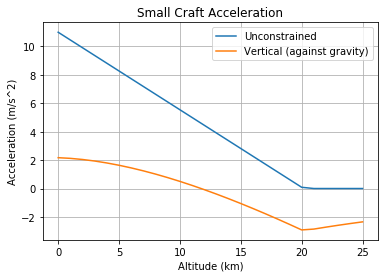

In [31]:
# Thrust with Altitude
r_vec = [r for r in range(120,120+26)]
alt_vec = [val - planet['radius'] for val in r_vec]

thruster_count = 4
a_vec = [ thruster_count*thruster['thrust_max']['value']*1000*e(r) / mass_system for r in r_vec ]
anet_vec = [ x-a(y) for x,y in zip(a_vec,r_vec) ] # thruster acceleration - acceleration due to gravity = net vertical acceleration

plt.plot( alt_vec, a_vec, alt_vec, anet_vec)
plt.xlabel('Altitude (km)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Small Craft Acceleration')
plt.legend(('Unconstrained','Vertical (against gravity)'))
plt.grid(True)
plt.show()


We can see that 4 thrusters should provide plenty of acceleration, perhaps too much. Consider that anything greater than 9.81 is acceleration faster than items fall on Earth. A good maneuverability target might be something like 0.5 m/s^2. We could break down the problem with that approach instead, showing craft and cargo mass limitations against altitude for a fixed max acceleration.

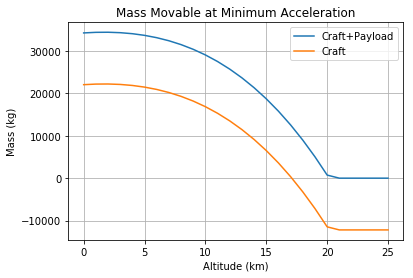

In [35]:
# Thrust with Altitude
r_vec = [r for r in range(120,120+26)]
alt_vec = [val - planet['radius'] for val in r_vec]

thruster_count = 4
container_count = 1
anet = 0.5
a_vec = [ anet + a(x) for x in r_vec ]
m_vec = [ thruster_count*thruster['thrust_max']['value']*1000*e(x)/y for x,y in zip(r_vec,a_vec)]
m_craft_vec = [ x - capacity_cargo*rho_ore for x in m_vec ]

plt.plot( alt_vec, m_vec, alt_vec, m_craft_vec)
plt.xlabel('Altitude (km)')
plt.ylabel('Mass (kg)')
plt.title('Mass Movable at Minimum Acceleration')
plt.legend(('Craft+Payload','Craft'))
plt.grid(True)
plt.show()

The current armored craft weight is about 18 t, which yields a max altitude of about 8 km. That's lower than the expected peak planet altitude as shown below, but acceptable for the majority of mining operations.

In [6]:
print("Peak altitude: ", planet['hills']*planet['radius'] )

Peak altitude:  14.399999999999999
